In [ ]:
import kagglehub
kazanova_sentiment140_path = kagglehub.dataset_download('kazanova/sentiment140')
prashant268_sentiment_analysis_lstm_path = kagglehub.notebook_output_download('prashant268/sentiment-analysis-lstm')

print('Data source import complete.')


Data source import complete.


In [ ]:
import re
from nltk.corpus import stopwords
import nltk

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [ ]:
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",encoding='latin-1',header=None)

**EDA & Data Preprocess**

In [ ]:
print(df.shape)
df.head()

(1600000, 6)


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
columns=['target','ids','date','flag','user','text']
df.columns=columns

In [ ]:
df.target.replace({0:'Negative',2:'Neutral',4:'Positive'},inplace=True)

<ipython-input-58-144053c49ae6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.target.replace({0:'Negative',2:'Neutral',4:'Positive'},inplace=True)


In [ ]:
df.drop_duplicates(subset='text', inplace=True)
print(df.shape)

(1581466, 6)


In [ ]:
df.head()

,target,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<class 'pandas.core.frame.DataFrame'>
Index: 1581466 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1581466 non-null  object
 1   ids     1581466 non-null  int64 
 2   date    1581466 non-null  object
 3   flag    1581466 non-null  object
 4   user    1581466 non-null  object
 5   text    1581466 non-null  object
dtypes: int64(1), object(5)
memory usage: 84.5+ MB


,count
user,
lost_dog,549
webwoke,341
SallytheShizzle,281
VioletsCRUK,279
mcraddictal,274
tsarnick,248
what_bugs_u,246
Karen230683,237
DarkPiano,234


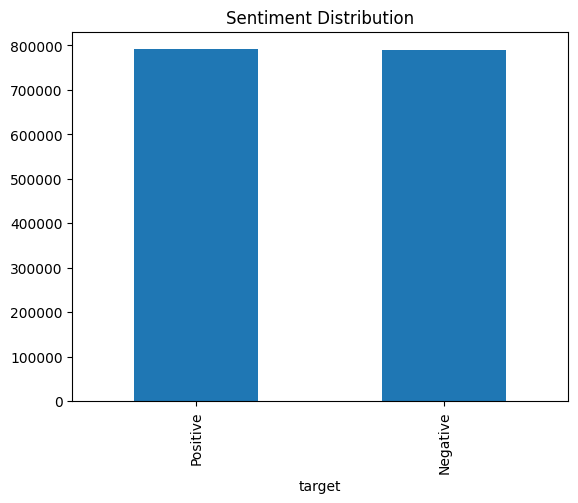

In [ ]:
# Get dataset info
df.info()

# Check for missing values
df.isnull().sum()

# Check the distribution of sentiment labels
df['target'].value_counts().plot(kind='bar', title='Sentiment Distribution')

# Check the length of tweets
df['tweet_length'] = df['text'].apply(len)

# Get basic stats on tweet length
df['tweet_length'].describe()

# Top 10 users by tweet count
df['user'].value_counts().head(10)


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words=set(stopwords.words('english'))
stop_words.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
corpus = []
for i in df.index:  # Iterate using df.index instead of range(len(df))
    review = re.sub('@\\S+|https?:\\S+|http?:\\S|[^A-Za-z0-9]+', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

df['text'] = corpus  # Update the dataframe with cleaned text

In [ ]:
# Extract datetime features
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

# Check the dataset after adding features
df.head()


<ipython-input-66-82cb6f5f454a>:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'])


,target,ids,date,flag,user,text,tweet_length,hour,day_of_week
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day,115,22,0
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,111,22,0
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,89,22,0
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,22,0
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,not behaving mad see,111,22,0


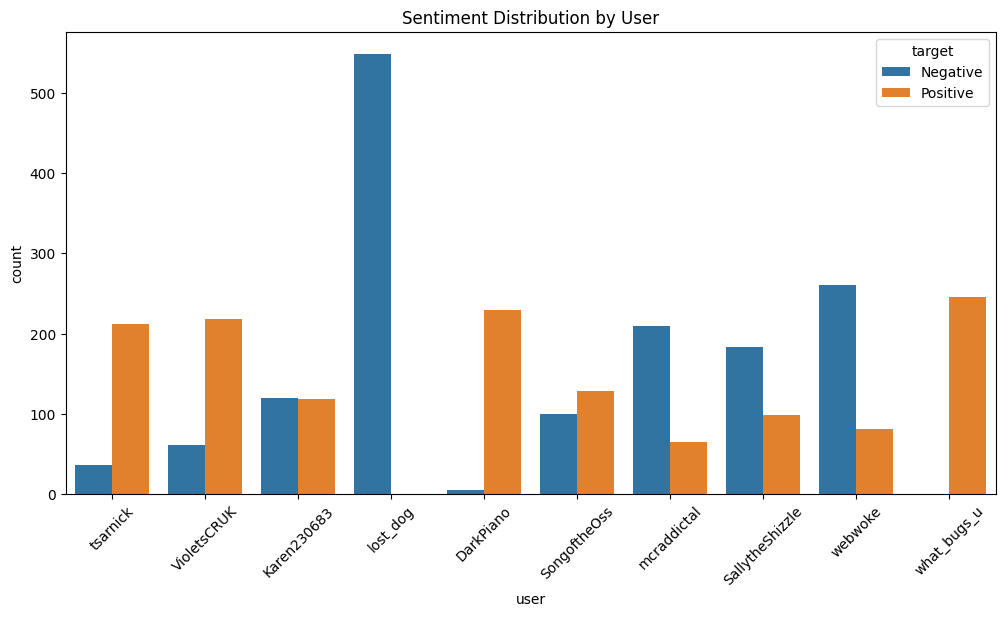

In [ ]:
import seaborn as sns

# Plot sentiment distribution by user (Top 10 users)
top_users = df['user'].value_counts().head(10).index
df_top_users = df[df['user'].isin(top_users)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_users, x='user', hue='target')
plt.title('Sentiment Distribution by User')
plt.xticks(rotation=45)
plt.show()


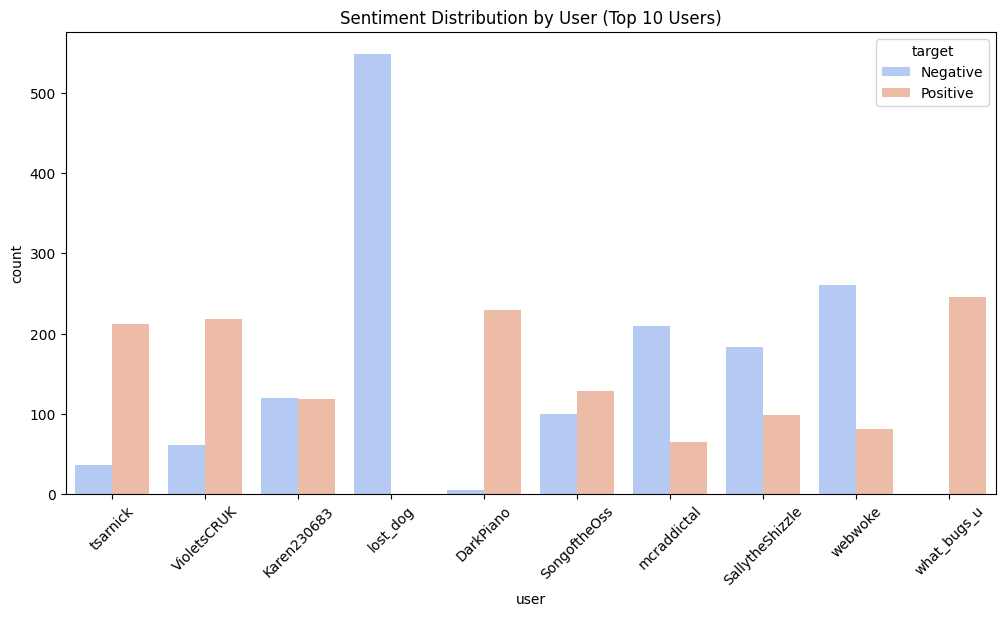

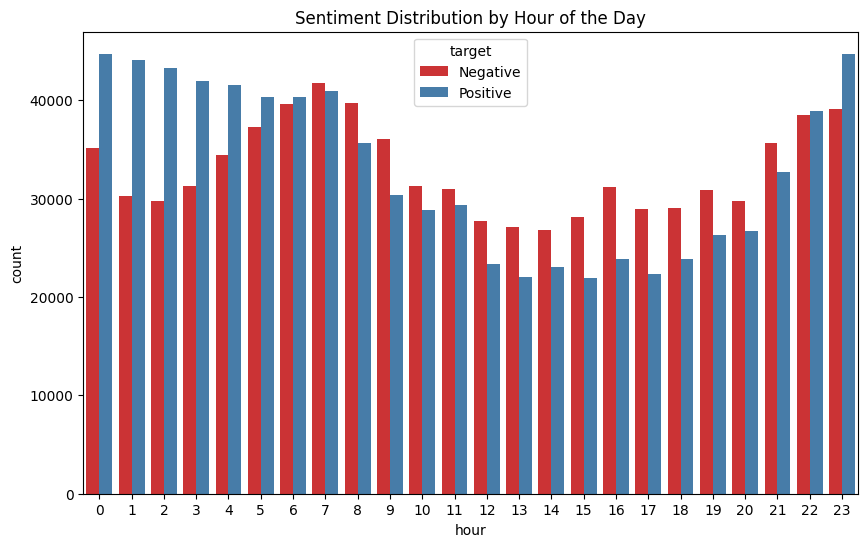

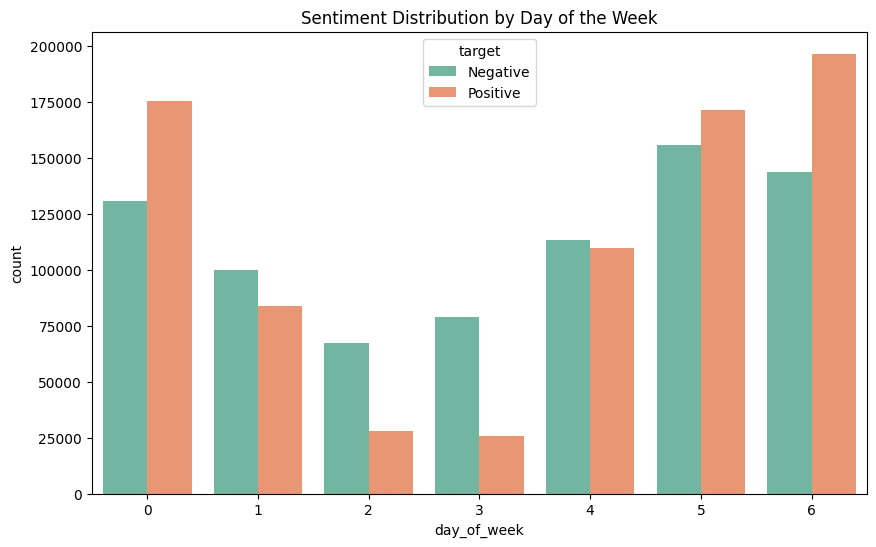

<ipython-input-68-011a6cba95b4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='tweet_length', data=df, palette='muted')


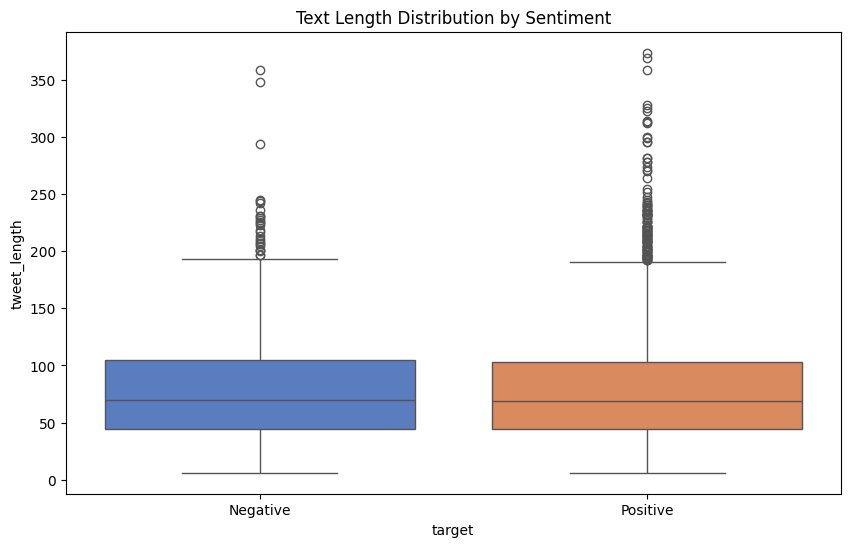

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_users, x='user', hue='target', palette='coolwarm')
plt.title('Sentiment Distribution by User (Top 10 Users)')
plt.xticks(rotation=45)
plt.show()

# Step 11: Sentiment Distribution by Hour of the Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', hue='target', palette='Set1')
plt.title('Sentiment Distribution by Hour of the Day')
plt.show()

# Step 12: Sentiment Distribution by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='target', palette='Set2')
plt.title('Sentiment Distribution by Day of the Week')
plt.show()

# Step 13: Text Length Distribution by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df, palette='muted')
plt.title('Text Length Distribution by Sentiment')
plt.show()

<Figure size 1400x600 with 0 Axes>

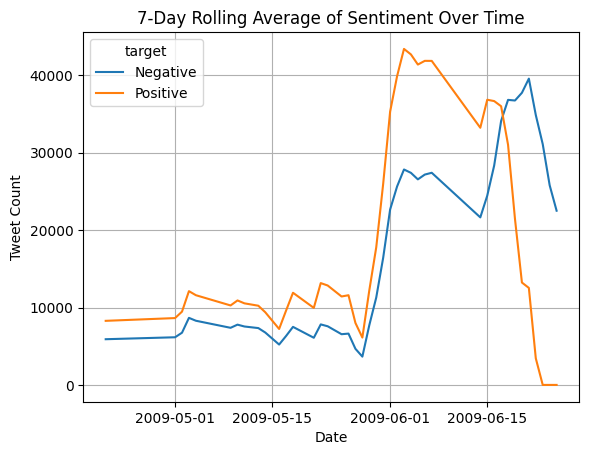

In [ ]:
# Average sentiment count per day
df['date_only'] = df['date'].dt.date
daily_sentiment = df.groupby(['date_only', 'target']).size().unstack().fillna(0)

plt.figure(figsize=(14,6))
daily_sentiment.rolling(7).mean().plot()
plt.title('7-Day Rolling Average of Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid()
plt.show()


In [ ]:
# Reset index
df.reset_index(drop=True, inplace=True)

# Optional: Remove usernames, hashtags, emojis more cleanly
def final_clean(text):
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove emojis and non-ASCII
    return text.strip()

df['text'] = df['text'].apply(final_clean)


In [ ]:
def remove_retweets_and_mentions(text):
    # Remove retweets (tweets starting with 'RT')
    text = re.sub(r'\bRT\b', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    return text

# Apply this function to clean the text further
df['text'] = df['text'].apply(remove_retweets_and_mentions)


In [ ]:
def remove_extra_whitespace(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

# Apply the function to clean the text further
df['text'] = df['text'].apply(remove_extra_whitespace)


,target,ids,date,flag,user,text,tweet_length,hour,day_of_week,date_only,upper_case_count,excl_count,quest_count,has_love,has_hate,has_happy,has_sad,has_angry,has_excited,has_depressed
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day,115,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,111,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,89,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,not behaving mad see,111,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0


In [ ]:
def remove_emojis(text):
    # Remove emojis using regex
    text = re.sub(r'[^\w\s,]', '', text)  # remove special characters
    return text

# Apply the function to remove emojis
df['text'] = df['text'].apply(remove_emojis)


,target,ids,date,flag,user,text,tweet_length,hour,day_of_week,date_only,upper_case_count,excl_count,quest_count,has_love,has_hate,has_happy,has_sad,has_angry,has_excited,has_depressed
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day,115,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,111,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,89,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,not behaving mad see,111,22,0,2009-04-06,0,0,0,0,0,0,0,0,0,0


In [ ]:
def handle_negations(text):
    # Replace common negations
    negations = ["no", "not", "isn't", "aren't", "wasn't", "weren't", "can't", "couldn't", "won't", "don't", "doesn't", "didn't"]
    for negation in negations:
        text = re.sub(rf'\b{negation}\b', f'_NOT_{negation}_', text)
    return text

# Apply the negation handler
df['text'] = df['text'].apply(handle_negations)


,target,ids,date,flag,user,text,tweet_length,hour,day_of_week,date_only
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day,115,22,0,2009-04-06
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,111,22,0,2009-04-06
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,89,22,0,2009-04-06
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,22,0,2009-04-06
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving mad see,111,22,0,2009-04-06


In [ ]:
def remove_hashtags(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    return text

# Apply the function to remove hashtags
df['text'] = df['text'].apply(remove_hashtags)


In [ ]:
df['text'] = df['text'].str.lower()

,target,ids,date,flag,user,text,tweet_length,hour,day_of_week,date_only
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day,115,22,0,2009-04-06
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,111,22,0,2009-04-06
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,89,22,0,2009-04-06
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,22,0,2009-04-06
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,not behaving mad see,111,22,0,2009-04-06


In [ ]:
from nltk.corpus import stopwords

# Add custom stopwords
additional_stopwords = ['url', 'user', 'retweet', 'tweet']
stop_words = set(stopwords.words('english')).union(set(additional_stopwords))

def remove_stopwords(text):
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in stop_words])

# Apply stopword removal
df['text'] = df['text'].apply(remove_stopwords)


In [ ]:
def remove_special_chars_and_numbers(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the function to clean the text
df['text'] = df['text'].apply(remove_special_chars_and_numbers)



<Axes: >

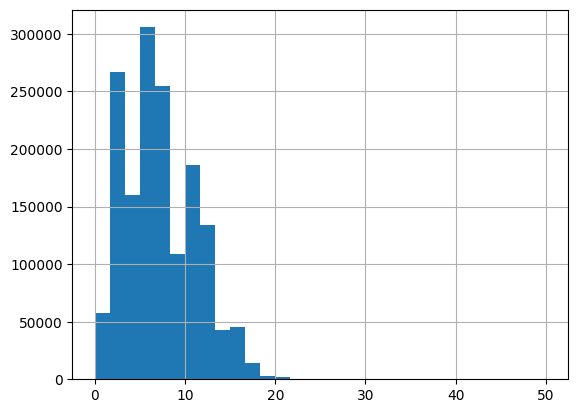

In [ ]:
#no of words for each tweet
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['word_count'].hist(bins=30)

In [ ]:
#most commmon words
from collections import Counter
all_words = ' '.join(df['text']).split()
common_words = Counter(all_words).most_common(20)
print(common_words)

[('good', 89981), ('day', 88196), ('get', 81716), ('like', 78256), ('go', 73347), ('quot', 71373), ('today', 67717), ('love', 64278), ('going', 64055), ('work', 63559), ('got', 60882), ('lol', 59078), ('time', 57516), ('back', 56250), ('u', 55871), ('one', 53691), ('know', 51860), ('im', 50358), ('really', 49613), ('amp', 48240)]


In [ ]:
#remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

#remove small words like a ,an
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))


In [ ]:
#. Remove empty tweets
df = df[df['text'].str.strip() != '']


In [ ]:
#no of words for negative and postive
df.groupby('target')['word_count'].count()


,word_count
target,
Negative,785677
Positive,786196


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

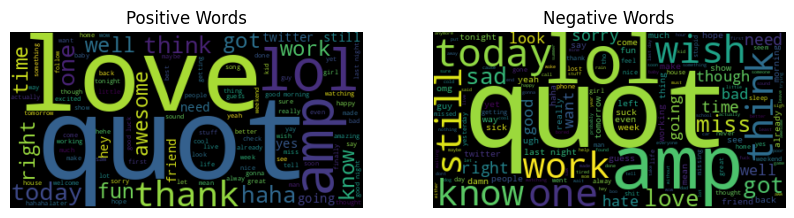

In [ ]:
from wordcloud import WordCloud

# Filter out empty strings in 'text' column before joining
pos_words = ' '.join(df[df['target']=='Positive']['text'].astype(str).str.strip().replace('', np.nan).dropna())
neg_words = ' '.join(df[df['target']=='Negative']['text'].astype(str).str.strip().replace('', np.nan).dropna())


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Positive Words")
plt.imshow(WordCloud(width=400, height=200).generate(pos_words), interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative Words")
plt.imshow(WordCloud(width=400, height=200).generate(neg_words), interpolation='bilinear')
plt.axis('off')

In [ ]:
#spell correction مش لازم نعملها علشان هتاخد وقت كبير
#from textblob import TextBlob
#df['text'] = df['text'].apply(lambda x: str(TextBlob(x).correct()))